## 선형회귀, 보스톤 집값
___

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

r_seed = 2022

In [59]:
import warnings

warnings.filterwarnings('ignore')

In [60]:
data = datasets.load_boston()  # dict 타입

In [61]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [62]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [63]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [64]:
y = data.target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [65]:
sr = pd.Series(data.target, name='Target')
sr

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 506, dtype: float64

In [66]:
df = pd.concat([df, sr], axis = 1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [68]:
df.duplicated().sum()

0

In [69]:
df.isna().sum(axis = 0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

### 상관관계

<AxesSubplot:>

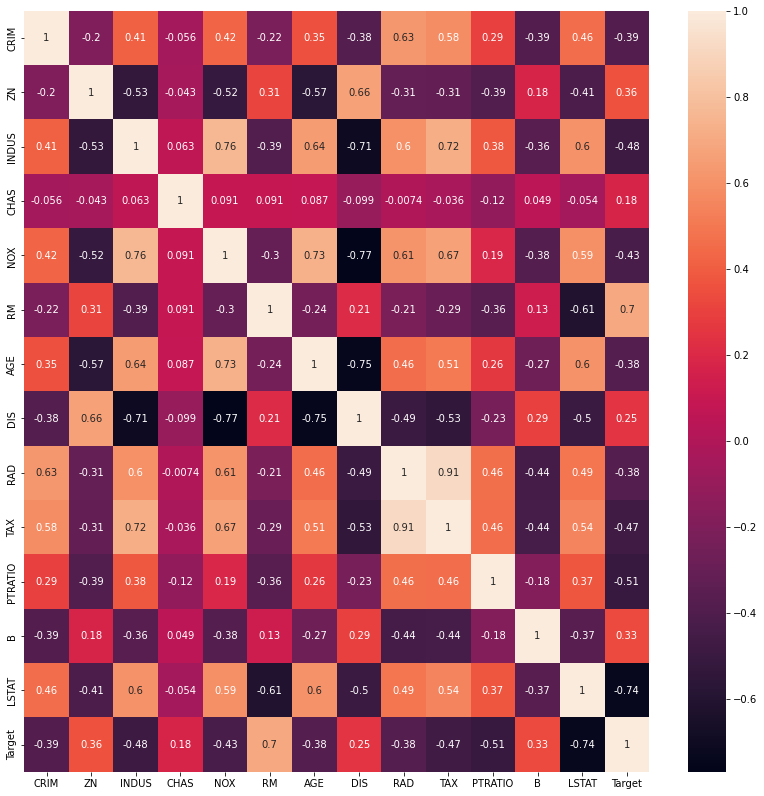

In [70]:
plt.figure(figsize = (14, 14))
sns.heatmap(df.corr(), annot=True)

In [71]:
c = df.corr()

In [72]:
c.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


In [73]:
c["Target"].abs().sort_values(ascending=False)

Target     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [112]:
cols = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'Target']

df = df[cols]

In [113]:
# X, y 분리

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [114]:
# 학습 / 테스트

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = r_seed)

X_train.shape, y_train.shape

((404, 4), (404,))

In [124]:
# 스케일링

mms = MinMaxScaler()
mms.fit_transform(X_train)
mms.transform(X_test)

array([[ 0.29249448,  0.47387906,  0.88297872,  0.29692082],
       [ 0.59630243,  0.05656109,  0.80851064,  0.64662757],
       [ 0.26821192,  0.41999177,  0.80851064,  0.64662757],
       [ 0.1192053 ,  0.70012341,  0.53191489,  0.2181085 ],
       [ 0.34133554,  0.36713287,  0.80851064,  0.64662757],
       [ 0.51352097,  0.45927602,  0.89361702,  0.28152493],
       [ 0.15756071,  0.48292884,  0.56382979,  0.23643695],
       [ 0.40783664,  0.35705471,  0.89361702,  0.28152493],
       [ 0.68736203,  0.29638009,  0.80851064,  0.64662757],
       [ 0.53559603,  0.31406828,  0.70212766,  0.33834311],
       [ 0.31401766,  0.48663102,  0.80851064,  0.64662757],
       [ 0.20336645,  0.4136158 ,  0.64893617,  0.45344575],
       [ 0.2406181 ,  0.49177293,  0.55319149,  0.35007331],
       [ 0.47682119,  0.43459482,  0.80851064,  0.64662757],
       [ 0.34878587,  0.41279309,  0.69148936,  0.9233871 ],
       [ 0.09933775,  0.6754422 ,  0.64893617,  0.06304985],
       [ 0.83498896,  0.

In [125]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [126]:
lm.coef_

array([-0.58911529,  5.37827005, -0.93085118,  0.04850291])

In [127]:
lm.intercept_

12.751687415758083

In [128]:
y_pred = lm.predict(X_test)
y_pred[:5]  # y hat 값

array([19.6160825 ,  3.33172681, 19.83971074, 32.19935121, 16.89633983])

In [129]:
np.max(y_test), np.min(y_test)

(50.0, 6.3)

In [130]:
np.max(y_pred), np.min(y_pred)

(41.08366747689707, 0.2740784912834382)

In [131]:
y_pred = lm.predict(X_test)
y_pred[:5]  # y hat 값

array([19.6160825 ,  3.33172681, 19.83971074, 32.19935121, 16.89633983])

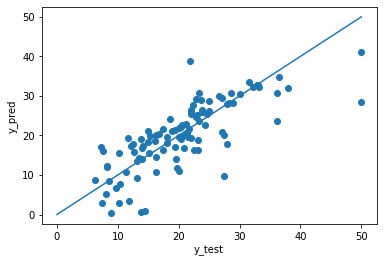

In [132]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.plot([0, 50], [0, 50])
plt.show()